# AutoGerberlation

Diego Alvarez <br>
diego.alvarez@colorado.edu

# Packages

In [1]:
import pandas as pd

# Accessing Gerber Object

In [2]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "src"))
from Gerber import Gerber

# Read in Data

In [3]:
df = pd.read_parquet(path = "df.parquet", engine = "pyarrow")
df_rtn = df["AAPL"]

# Autocorrelation Function

In [4]:
def autogerberlation(ts: pd.Series, lags: int, threshold: float = 1/2, method: str = "method1") -> pd.Series: 

    df = ts.rename(0).to_frame()
    for i in range(1, lags): df[i] = ts.shift(i)
    corr = Gerber().corr(rtns = df, threshold = threshold, method = method)
    corr.columns.name = "lag"
    return corr[0]

In [5]:
autogerber = autogerberlation(df_rtn, lags = 40)

<AxesSubplot:xlabel='lag'>

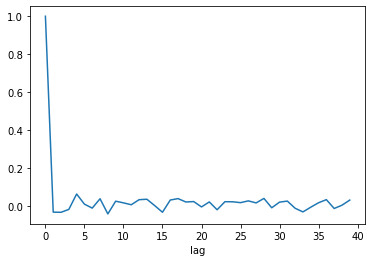

In [6]:
autogerber.plot()